In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
!nvidia-smi

Wed May  4 16:13:06 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P0    30W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [4]:
import sys
# setting path
sys.path.append("/home/ky2446/simclr")
sys.path.append("/home/ky2446/simclr/simclr")
sys.path.append("/home/ky2446/simclr/simclr/layers")
sys.path.append("/home/ky2446/simclr/simclr/models")
sys.path.append("/home/ky2446/simclr/simclr/loss")
sys.path.append("/home/ky2446/simclr/simclr/optim")
sys.path.append("/home/ky2446/simclr/simclr/dataloader")

In [14]:
from simclrpy import SimClr
from ntxent import nt_xent_loss
from ntxentgit import SimCLR_Loss
from augment import TransformsSimCLR
from utils import *
from LARS import LARS
from downstream import DownStream
from dataloader import *
import pickle

In [6]:
import torch
import torchvision
import torchvision.transforms as transforms
import numpy as np

In [7]:
train_loader_simclr = train_loader_simclr("CIFAR10",128)
test_loader = test_loader("CIFAR10",128)
test_images, test_labels = get_testimgs_list("CIFAR10")

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


In [8]:
proj_dim = 128
model = SimClr('resnet50',proj_dim).cuda()
temperature = 0.5
#criterion = nt_xent_loss
criterion = SimCLR_Loss(128,0.5)
optimizer = "LARS"
model, train_loss = train_simclr(train_loader_simclr,model,criterion,optimizer,100,128,True,"/content/model1")

/content/drive/MyDrive/simclr/optim/LARS.py:136: UserWarning: This overload of add_ is deprecated:
	add_(Number alpha, Tensor other)
Consider using one of the following signatures instead:
	add_(Tensor other, *, Number alpha) (Triggered internally at  ../torch/csrc/utils/python_arg_parser.cpp:1055.)
  next_v.mul_(momentum).add_(scaled_lr, grad)


Epoch: 0, step: 50/390, loss: 5.53007698059082
Epoch: 0, step: 100/390, loss: 5.467336654663086
Epoch: 0, step: 150/390, loss: 5.488121032714844
Epoch: 0, step: 200/390, loss: 5.3604326248168945
Epoch: 0, step: 250/390, loss: 5.325634002685547
Epoch: 0, step: 300/390, loss: 5.233689785003662
Epoch: 0, step: 350/390, loss: 5.174006938934326
Epoch: 0 completed, average loss: 5.380153981233255, time taken: 3.1905666987101235 mins
Epoch: 1, step: 50/390, loss: 5.189033031463623
Epoch: 1, step: 100/390, loss: 5.02957010269165
Epoch: 1, step: 150/390, loss: 5.08118200302124
Epoch: 1, step: 200/390, loss: 5.150210380554199
Epoch: 1, step: 250/390, loss: 5.117499351501465
Epoch: 1, step: 300/390, loss: 4.924752712249756
Epoch: 1, step: 350/390, loss: 5.0614333152771
Epoch: 1 completed, average loss: 5.063137248846201, time taken: 3.163666001955668 mins
Epoch: 2, step: 50/390, loss: 4.892119407653809
Epoch: 2, step: 100/390, loss: 4.979701519012451
Epoch: 2, step: 150/390, loss: 4.9012012481689

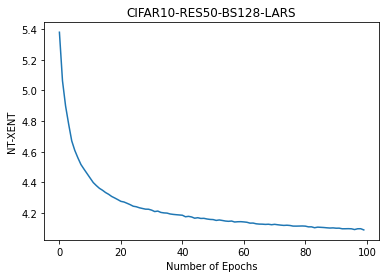

In [13]:
plt.xlabel("Number of Epochs")
plt.ylabel("NT-XENT")
plt.title("CIFAR10-RES50-BS128-LARS")
plt.plot(train_loss)
plt.savefig("/content/CIFAR10-RES50-BS128-LARS.png")

In [15]:
with open("/content/CIFAR10-RES50-BS128-LARS", "wb") as fp:   #Pickling
  pickle.dump(train_loss, fp)